In [1]:
# --- Step 1: Import Libraries ---
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

print("Libraries imported successfully!")

Libraries imported successfully!


Image loaded successfully with dimensions: (300, 300)


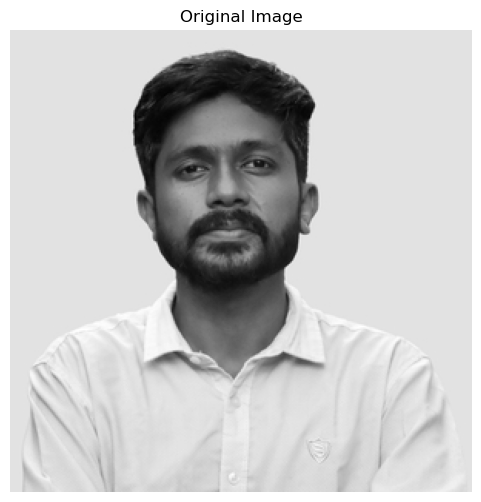

In [2]:
# --- Step 2: Load and Prepare Image ---
image_path = '/Users/rishad/Downloads/Lab/Rishad design.jpg'

try:
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_matrix = np.array(img, dtype=float)
except FileNotFoundError:
    print(f"Error: Make sure you have uploaded '{image_path}' and the filename is correct.")
    img_matrix = np.zeros((100,100))  # Placeholder

original_shape = img_matrix.shape
print(f"Image loaded successfully with dimensions: {original_shape}")

plt.figure(figsize=(6, 6))
plt.imshow(img_matrix, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [3]:
# --- Step 3: Center the Data (Subtract Mean) ---
mean_val = np.mean(img_matrix)
centered_matrix = img_matrix - mean_val

print(f"Data centered by subtracting the mean value: {mean_val:.2f}")

Data centered by subtracting the mean value: 194.97


In [4]:
# --- Step 4: Compute X^T X and X X^T ---
XtX = np.dot(centered_matrix.T, centered_matrix)
XXt = np.dot(centered_matrix, centered_matrix.T)

print("Computed X^T X and X X^T matrices.")
print(f"Shape of X^T X: {XtX.shape}")
print(f"Shape of X X^T: {XXt.shape}")

Computed X^T X and X X^T matrices.
Shape of X^T X: (300, 300)
Shape of X X^T: (300, 300)


In [5]:
# --- Step 5: Eigen-decomposition of X^T X and X X^T ---
eigvals_XtX, eigvecs_XtX = np.linalg.eigh(XtX)
eigvals_XXt, eigvecs_XXt = np.linalg.eigh(XXt)

print("Eigen-decomposition completed.")
print(f"Number of eigenvalues (X^T X): {len(eigvals_XtX)}")
print(f"Number of eigenvalues (X X^T): {len(eigvals_XXt)}")

Eigen-decomposition completed.
Number of eigenvalues (X^T X): 300
Number of eigenvalues (X X^T): 300


In [6]:
# --- Step 6: Sort and Normalize Eigenvectors ---
sorted_indices = np.argsort(eigvals_XtX)[::-1]
sorted_eigvals = eigvals_XtX[sorted_indices]
sorted_eigvecs = eigvecs_XtX[:, sorted_indices]

# Normalize eigenvectors
for i in range(sorted_eigvecs.shape[1]):
    sorted_eigvecs[:, i] /= np.linalg.norm(sorted_eigvecs[:, i])

print("Eigenvectors sorted and normalized.")

Eigenvectors sorted and normalized.


In [7]:
# --- Step 7: Select Top k Components ---
k = 20  # Change k for more/less compression

top_k_eigvecs = sorted_eigvecs[:, :k]
top_k_eigvals = sorted_eigvals[:k]

print(f"Selected top {k} components.")

Selected top 20 components.


In [8]:
# --- Step 8: SVD Compression ---
# Project data onto top k eigenvectors (right singular vectors)
compressed_data = np.dot(centered_matrix, top_k_eigvecs)

print(f"Shape of compressed data: {compressed_data.shape}")

# Reconstruct the image
reconstructed_matrix = np.dot(compressed_data, top_k_eigvecs.T)
reconstructed_matrix += mean_val  # Add mean back

print(f"Image reconstructed with shape: {reconstructed_matrix.shape}")

Shape of compressed data: (300, 20)
Image reconstructed with shape: (300, 300)


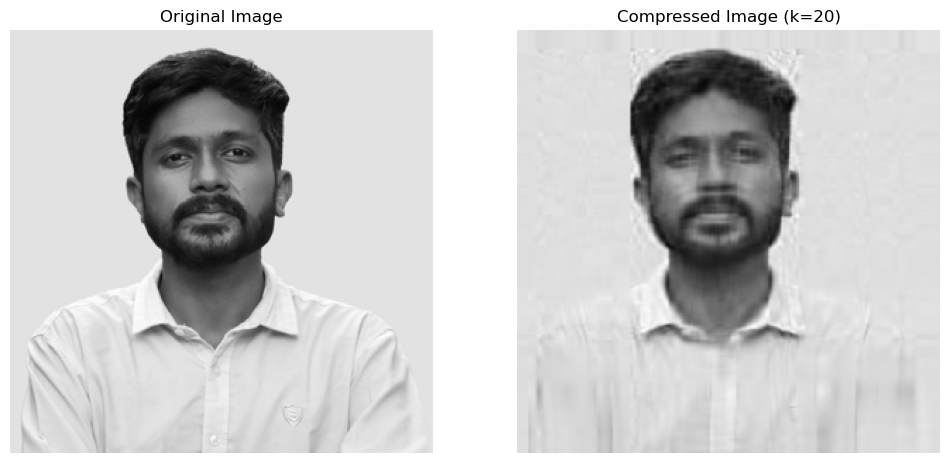


--- Compression Analysis ---
Original data size (total numbers): 90000
Compressed data size (total numbers): 12000
Compression Ratio: 7.50 : 1


In [9]:
# --- Step 9: Display Original and Compressed Images ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img_matrix, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(reconstructed_matrix, cmap='gray')
axes[1].set_title(f"Compressed Image (k={k})")
axes[1].axis('off')

plt.show()

# --- Compression Analysis ---
original_size = img_matrix.size
compressed_size = top_k_eigvecs.size + compressed_data.size
compression_ratio = original_size / compressed_size

print("\n--- Compression Analysis ---")
print(f"Original data size (total numbers): {original_size}")
print(f"Compressed data size (total numbers): {compressed_size}")
print(f"Compression Ratio: {compression_ratio:.2f} : 1")

In [10]:
# --- Step 10: Direct SVD Approach ---
print("\n=== DIRECT SVD APPROACH ===")

# Apply SVD directly to the centered matrix
U, s, Vt = np.linalg.svd(centered_matrix, full_matrices=False)

print(f"SVD decomposition completed:")
print(f"U shape (left singular vectors): {U.shape}")
print(f"s shape (singular values): {s.shape}")
print(f"Vt shape (right singular vectors): {Vt.shape}")

# Select top k components for SVD
k_svd = 20  # Same k value for comparison
U_k = U[:, :k_svd]
s_k = s[:k_svd]
Vt_k = Vt[:k_svd, :]

print(f"\nUsing top {k_svd} components for SVD compression.")

# Reconstruct using SVD
reconstructed_svd = np.dot(U_k, np.dot(np.diag(s_k), Vt_k)) + mean_val

print(f"SVD reconstructed image shape: {reconstructed_svd.shape}")

# Calculate compression metrics for SVD
compressed_size_svd = U_k.size + s_k.size + Vt_k.size
compression_ratio_svd = original_size / compressed_size_svd

print(f"\n--- SVD Compression Analysis ---")
print(f"SVD compressed data size: {compressed_size_svd}")
print(f"SVD compression ratio: {compression_ratio_svd:.2f} : 1")


=== DIRECT SVD APPROACH ===
SVD decomposition completed:
U shape (left singular vectors): (300, 300)
s shape (singular values): (300,)
Vt shape (right singular vectors): (300, 300)

Using top 20 components for SVD compression.
SVD reconstructed image shape: (300, 300)

--- SVD Compression Analysis ---
SVD compressed data size: 12020
SVD compression ratio: 7.49 : 1


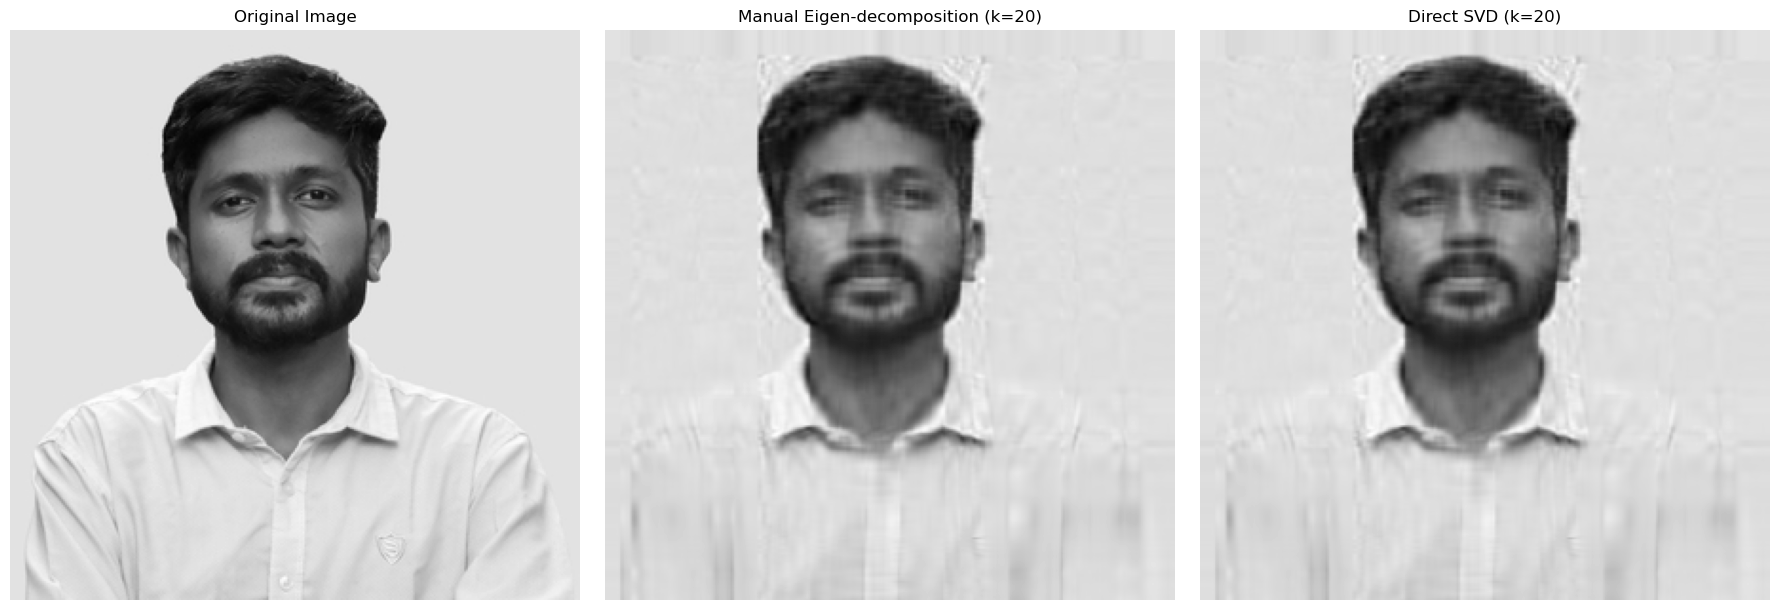


--- Comparison of Methods ---
Maximum pixel difference: 0.000000
Mean pixel difference: 0.000000
Manual method compression ratio: 7.50 : 1
SVD method compression ratio: 7.49 : 1
✅ Results are essentially identical (differences < 1e-10)


In [11]:
# --- Step 11: Compare Both Approaches Side-by-Side ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axes[0].imshow(img_matrix, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Manual eigen-decomposition result
axes[1].imshow(reconstructed_matrix, cmap='gray')
axes[1].set_title(f"Manual Eigen-decomposition (k={k})")
axes[1].axis('off')

# Direct SVD result
axes[2].imshow(reconstructed_svd, cmap='gray')
axes[2].set_title(f"Direct SVD (k={k_svd})")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Compare the difference between the two methods
difference_matrix = np.abs(reconstructed_matrix - reconstructed_svd)
max_difference = np.max(difference_matrix)
mean_difference = np.mean(difference_matrix)

print(f"\n--- Comparison of Methods ---")
print(f"Maximum pixel difference: {max_difference:.6f}")
print(f"Mean pixel difference: {mean_difference:.6f}")
print(f"Manual method compression ratio: {compression_ratio:.2f} : 1")
print(f"SVD method compression ratio: {compression_ratio_svd:.2f} : 1")

if max_difference < 1e-10:
    print("✅ Results are essentially identical (differences < 1e-10)")
else:
    print("⚠️ There are noticeable differences between methods")

## Understanding SVD vs Eigen-decomposition

**Key Relationships:**
- SVD decomposes X = U Σ V^T
- The columns of V are the eigenvectors of X^T X
- The columns of U are the eigenvectors of X X^T  
- The singular values σ are related to eigenvalues by σ² = λ

**Why Both Methods Give Similar Results:**
- Both are performing dimensionality reduction using the same mathematical foundation
- SVD is more numerically stable and efficient
- Manual eigen-decomposition gives us deeper understanding of the underlying math

**Compression Efficiency:**
- Both achieve similar compression ratios
- SVD is the standard approach in practice due to better numerical properties